In [388]:
import warnings
warnings.filterwarnings("ignore")

In [389]:
# Importing 
# Libraries
#import dtale

import warnings
import itertools
%matplotlib inline
import numpy as np
import pandas as pd

from math import sqrt
import seaborn as sns

#import missingno as mn
import plotly.io as pio
sns.set_style('darkgrid')

from pandas import Grouper
import scipy.stats as stat
import plotly.express as px
from pandas import DataFrame

import statsmodels.api as smf
import pandas_profiling as pp
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objects as go
import plotly.figure_factory as ff

from pandas.plotting import lag_plot
import statsmodels.formula.api as sm
from plotly.offline import plot as off
from plotly.subplots import make_subplots

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.feature_selection import SelectKBest
#from pandas_visual_analysis import VisualAnalysis
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES

from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale, RobustScaler, QuantileTransformer
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
from math import sqrt
from pandas import read_csv
from pandas import read_excel
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [391]:
df = read_excel('/Users/vaishalimukherjee/Desktop/Project 1/oilprice/RWTCm.xls',header=0,index_col=0,parse_dates=True)
df.head()

,COSP
Date,
1986-01-15,22.93
1986-02-15,15.46
1986-03-15,12.61
1986-04-15,12.84
1986-05-15,15.38


### Augmented Dickey Fuller Test

In [392]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

### Split Train Test Data

In [393]:
#Splitting Train and Test Data sequentially for our time series dataset
size = 432
train_data = df[:size]
test_data = df[size:]

In [394]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1986-01-15 00:00:00 2021-12-15 00:00:00 
 Test: 2022-01-15 00:00:00 2023-12-15 00:00:00


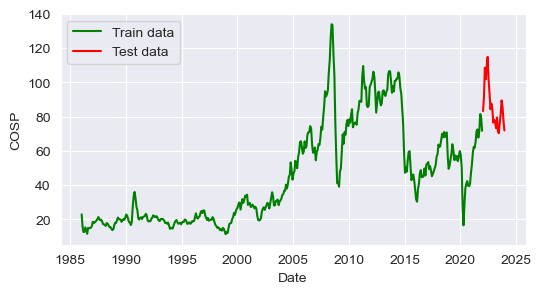

In [395]:
plt.figure(figsize=(6,3))
plt.xlabel('Date')
plt.ylabel('COSP')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

### Persistence/ Base model

In [396]:
# separate out a validation dataset
split_point = len(df) - 24
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)
print(dataset.shape)
print(validation.shape)
print(dataset.head())
print(validation.head())

Dataset 432, Validation 24
(432, 1)
(24, 1)
             COSP
Date             
1986-01-15  22.93
1986-02-15  15.46
1986-03-15  12.61
1986-04-15  12.84
1986-05-15  15.38
              COSP
Date              
2022-01-15   83.22
2022-02-15   91.64
2022-03-15  108.50
2022-04-15  101.78
2022-05-15  109.55


In [397]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
print(train.head())
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
print(dataset.shape)
print(validation.shape)

0
1986-01-15    22.93
1986-02-15    15.46
1986-03-15    12.61
1986-04-15    12.84
1986-05-15    15.38
Name: 1, dtype: float64
(432, 1)
(24, 1)


In [398]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=32.130, Expected=34.310
>Predicted=34.310, Expected=34.690
>Predicted=34.690, Expected=36.740
>Predicted=36.740, Expected=36.750
>Predicted=36.750, Expected=40.280
>Predicted=40.280, Expected=38.030
>Predicted=38.030, Expected=40.780
>Predicted=40.780, Expected=44.900
>Predicted=44.900, Expected=45.940
>Predicted=45.940, Expected=53.280
>Predicted=53.280, Expected=48.470
>Predicted=48.470, Expected=43.150
>Predicted=43.150, Expected=46.840
>Predicted=46.840, Expected=48.150
>Predicted=48.150, Expected=54.190
>Predicted=54.190, Expected=52.980
>Predicted=52.980, Expected=49.830
>Predicted=49.830, Expected=56.350
>Predicted=56.350, Expected=59.000
>Predicted=59.000, Expected=64.990
>Predicted=64.990, Expected=65.590
>Predicted=65.590, Expected=62.260
>Predicted=62.260, Expected=58.320
>Predicted=58.320, Expected=59.410
>Predicted=59.410, Expected=65.490
>Predicted=65.490, Expected=61.630
>Predicted=61.630, Expected=62.690
>Predicted=62.690, Expected=69.440
>Predicted=69.440, E

#### Base Model RMSE = 6.105
Our model should perform better than this 

### Test of Stationarity

#### As we have monthly data the window size for moving average is equal to 12

In [399]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['COSP'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

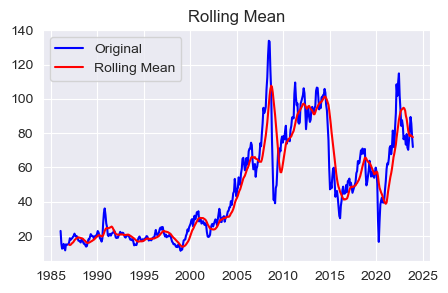

Results of Dickey Fuller Test:
Test Statistic                  -1.936596
p-value                          0.315046
#Lags Used                       6.000000
Number of Observations Used    449.000000
Critical Value (1%)             -3.444998
Critical Value (5%)             -2.867999
Critical Value (10%)            -2.570210
dtype: float64


In [400]:
# Augmented Dicky Fuller Test
cosp= pd.DataFrame()
cosp['COSP'] = df['COSP']
test_stationarity(cosp)

In [401]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

### Check stationarity using Dickey-Fuller Test

In [402]:
adf_test(cosp['COSP'])

Fail to reject the null hypothesis
Data is non-stationary


### Feature Scaling (Transformations)

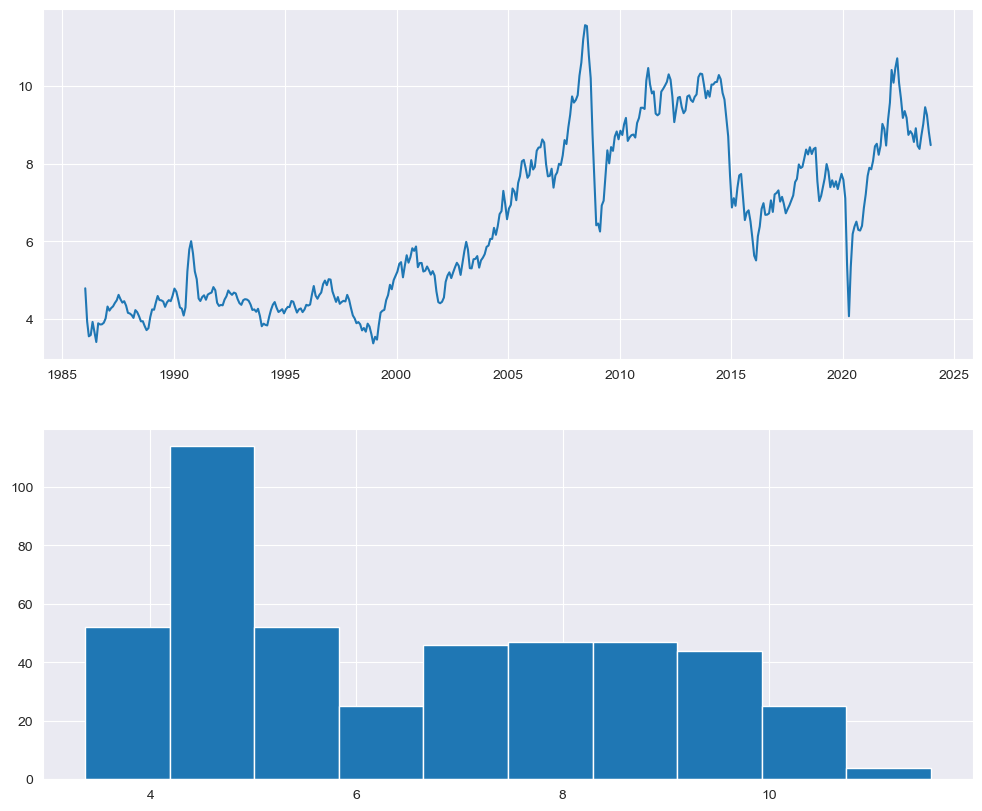

In [403]:
# Square root transform 
square_root= pd.DataFrame()
square_root = df[['COSP']]
square_root['COSP'] = np.sqrt(square_root.COSP)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['COSP'])
#Histogram
plt.subplot(212)
plt.hist(square_root['COSP'])
plt.show()

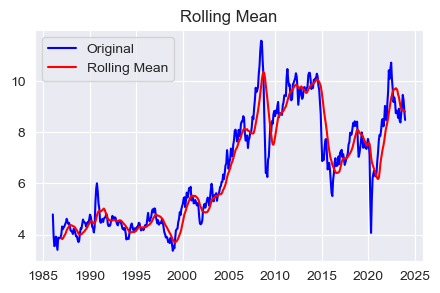

Results of Dickey Fuller Test:
Test Statistic                  -2.304032
p-value                          0.170671
#Lags Used                       1.000000
Number of Observations Used    454.000000
Critical Value (1%)             -3.444836
Critical Value (5%)             -2.867927
Critical Value (10%)            -2.570172
dtype: float64


In [404]:
test_stationarity(square_root)

In [405]:
adf_test(square_root.COSP)

Fail to reject the null hypothesis
Data is non-stationary


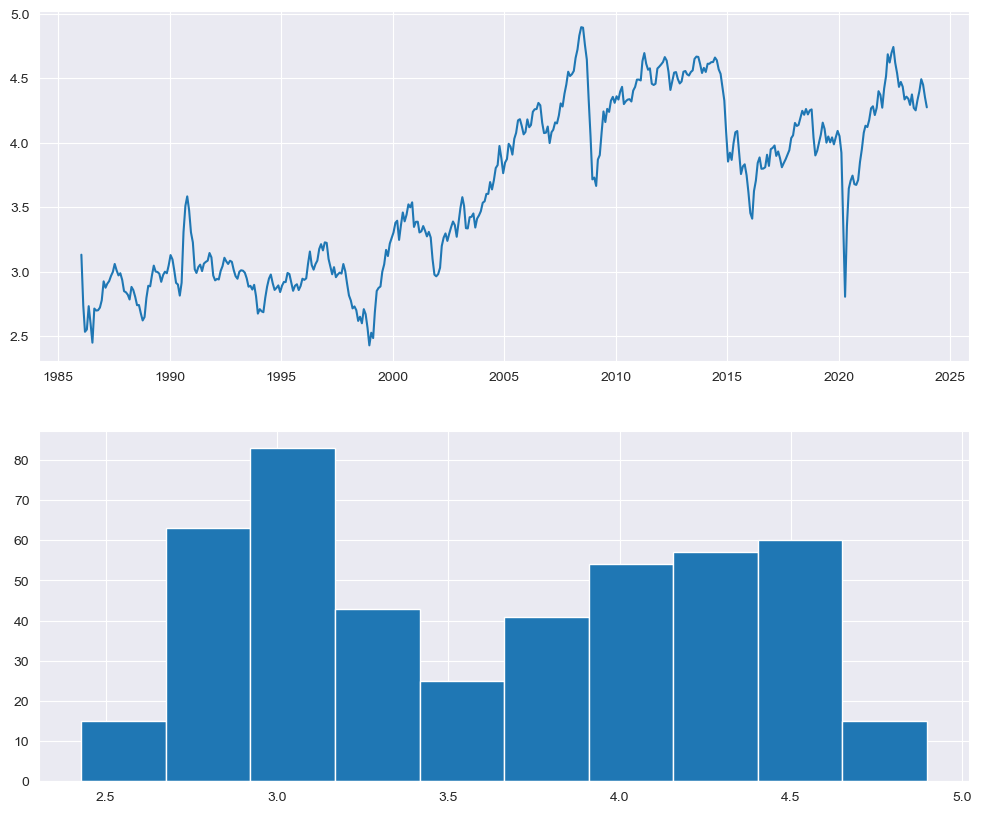

In [406]:
# Log transform 
log = pd.DataFrame()
log = df[['COSP']]
log['COSP'] = np.log(log.COSP)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['COSP'])
#Histogram
plt.subplot(212)
plt.hist(log['COSP'])
plt.show()

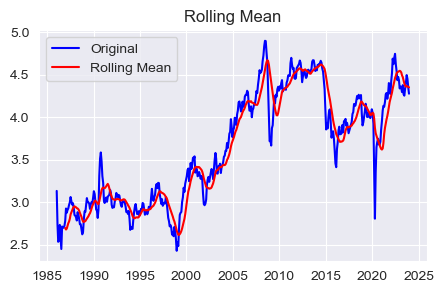

Results of Dickey Fuller Test:
Test Statistic                  -1.741455
p-value                          0.409890
#Lags Used                       4.000000
Number of Observations Used    451.000000
Critical Value (1%)             -3.444933
Critical Value (5%)             -2.867970
Critical Value (10%)            -2.570195
dtype: float64


In [407]:
test_stationarity(log)

In [408]:
adf_test(log.COSP)

Fail to reject the null hypothesis
Data is non-stationary


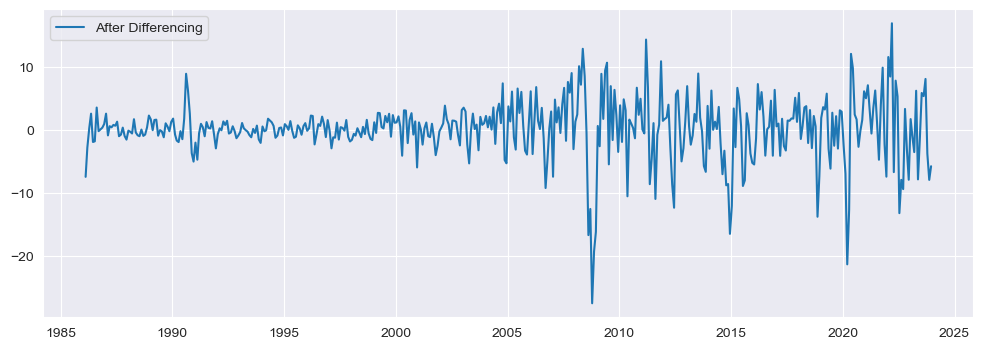

In [409]:
# Differencing, seasonal differencing, transform : Log differencing
differencing = df - df.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

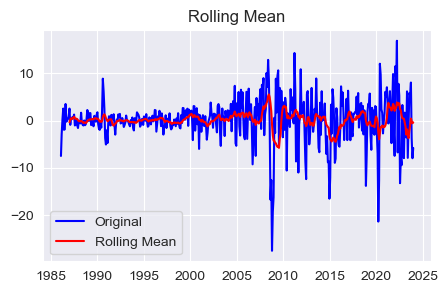

Results of Dickey Fuller Test:
Test Statistic                -1.018377e+01
p-value                        6.590164e-18
#Lags Used                     5.000000e+00
Number of Observations Used    4.490000e+02
Critical Value (1%)           -3.444998e+00
Critical Value (5%)           -2.867999e+00
Critical Value (10%)          -2.570210e+00
dtype: float64


In [410]:
test_stationarity(differencing)

In [411]:
adf_test(differencing)

Reject the null hypothesis
Data is stationary


In [412]:
print(df.shape)
print(differencing.shape)

(456, 1)
(455, 1)


In [413]:
##############################

In [414]:
# BOX COX

In [415]:
df1 = read_excel('/Users/vaishalimukherjee/Desktop/Project 1/oilprice/RWTCa.xls')
df1.head()

,Date,COSP
0,1986-06-30,15.05
1,1987-06-30,19.20
2,1988-06-30,15.97
3,1989-06-30,19.64
4,1990-06-30,24.53


In [416]:
df1.shape

(38, 2)

In [417]:
df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021, 2022, 2023],
           dtype='int64', name='Date')

In [418]:
#Sampling - Linear interpolation - UpSampling with respect to month
upsampled_month = df1.copy()
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(13))

             COSP
Date             
1986-06-30  15.05
1986-07-31    NaN
1986-08-31    NaN
1986-09-30    NaN
1986-10-31    NaN
1986-11-30    NaN
1986-12-31    NaN
1987-01-31    NaN
1987-02-28    NaN
1987-03-31    NaN
1987-04-30    NaN
1987-05-31    NaN
1987-06-30  19.20


                 COSP
Date                 
1986-06-30  15.050000
1986-07-31  15.395833
1986-08-31  15.741667
1986-09-30  16.087500
1986-10-31  16.433333
1986-11-30  16.779167
1986-12-31  17.125000
1987-01-31  17.470833
1987-02-28  17.816667
1987-03-31  18.162500
1987-04-30  18.508333
1987-05-31  18.854167
1987-06-30  19.200000


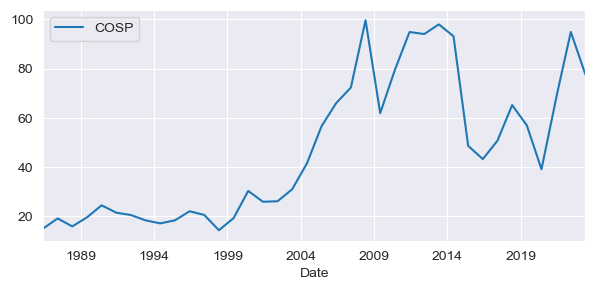

In [419]:
interpolated_month = upsampled_month.interpolate(method='linear')
print(interpolated_month.head(13))
interpolated_month.plot(figsize=(7,3))
plt.show()

In [420]:
interpolated_month.shape

(445, 1)

In [421]:
interpolated_month.head()

,COSP
Date,
1986-06-30,15.050000
1986-07-31,15.395833
1986-08-31,15.741667
1986-09-30,16.087500
1986-10-31,16.433333


In [422]:
train_data = interpolated_month[:432]
test_data = interpolated_month[432:]

,COSP
Date,
1986-06-30,2.711378
1986-07-31,2.734097
1986-08-31,2.756311
1986-09-30,2.778043
1986-10-31,2.799312


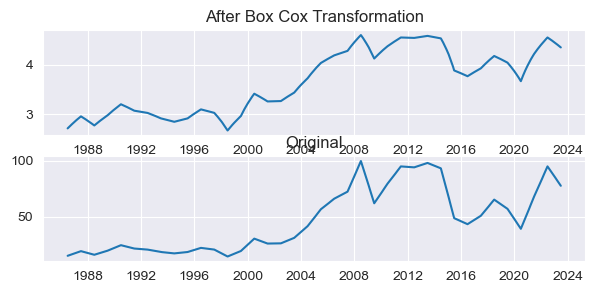

In [423]:
# Converting Non-Stationary Time Series into Stationary : Box Cox Transformation
data_boxcox = pd.DataFrame()
data_boxcox['COSP'] = pd.Series(boxcox(interpolated_month['COSP'], lmbda=0), interpolated_month.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(7,3),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(interpolated_month, label='original')
axis[1].set_title('Original')
plt.show()

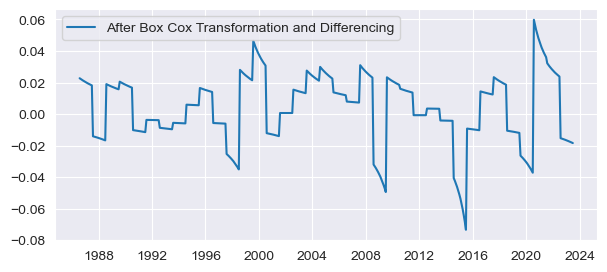

In [424]:
#Differencing of the Box-Cox Transformation
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(7,3))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

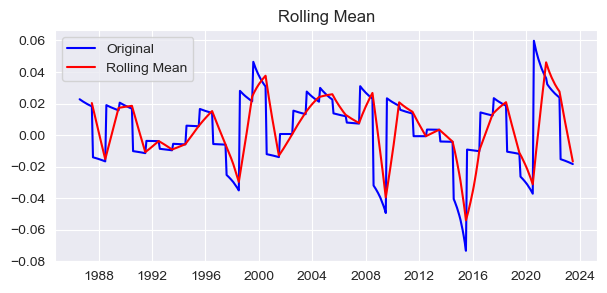

Results of Dickey Fuller Test:
Test Statistic                  -4.654533
p-value                          0.000102
#Lags Used                      12.000000
Number of Observations Used    431.000000
Critical Value (1%)             -3.445614
Critical Value (5%)             -2.868269
Critical Value (10%)            -2.570354
dtype: float64


In [425]:
plt.figure(figsize=(7,3))
test_stationarity(data_boxcox_diff)

In [426]:
adf_test(data_boxcox_diff.COSP)

Reject the null hypothesis
Data is stationary


In [427]:
print(data_boxcox.shape)
print(data_boxcox_diff.shape)

(445, 1)
(444, 1)


In [428]:
train_data_boxcox = data_boxcox[:421]
test_data_boxcox = data_boxcox[421:]
train_data_boxcox_diff = data_boxcox_diff[:420]
test_data_boxcox_diff = data_boxcox_diff[420:]

In [429]:
def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [340]:
# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [364]:
# Evaluate parameters
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
evaluate_models(train_data_boxcox_diff.COSP, p_values, d_values, q_values)

Best ARIMA(2, 0, 1) RMSE=0.011


In [430]:
#Inverse transformation of the Box-Cox Differencing
model = ARIMA(train_data_boxcox_diff, order=(2, 0, 1))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.COSP[0])

# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

In [431]:
test_data.shape

(13, 1)

In [432]:
test_data.head()

,COSP
Date,
2022-06-30,94.900000
2022-07-31,93.456667
2022-08-31,92.013333
2022-09-30,90.570000
2022-10-31,89.126667


In [433]:
print(test_data.index.min())

2022-06-30 00:00:00


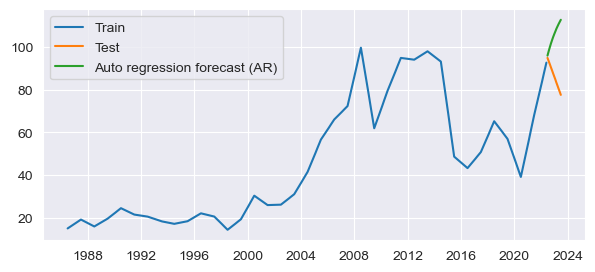

In [434]:
plt.figure(figsize=(7,3))
plt.plot(train_data['COSP'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

#### Observation
We can see that we have done moderately well.
No Seasonality captured. Only Trend has been captured

In [435]:
rmse_arima = np.sqrt(mean_squared_error(test_data.COSP, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

21.84

In [436]:
mape_arima = round(np.mean(np.abs((test_data.COSP - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.COSP)*100),2)
mape_arima

23.0

In [437]:
#Analysing the Residuals
#The mean of the Residual should be zero or close to Zero
model_residual = model_fit.resid
model_residual.mean()


-2.926156267280762e-05

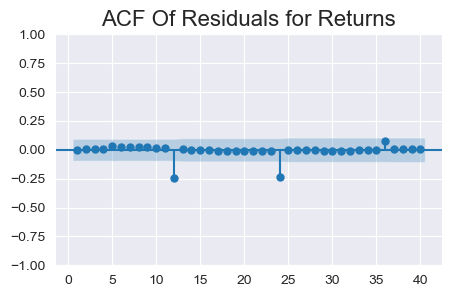

In [438]:
from statsmodels.graphics.tsaplots import plot_acf
#ACF Plot
plt.rcParams["figure.figsize"] = (5,3)
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=16)
plt.show()

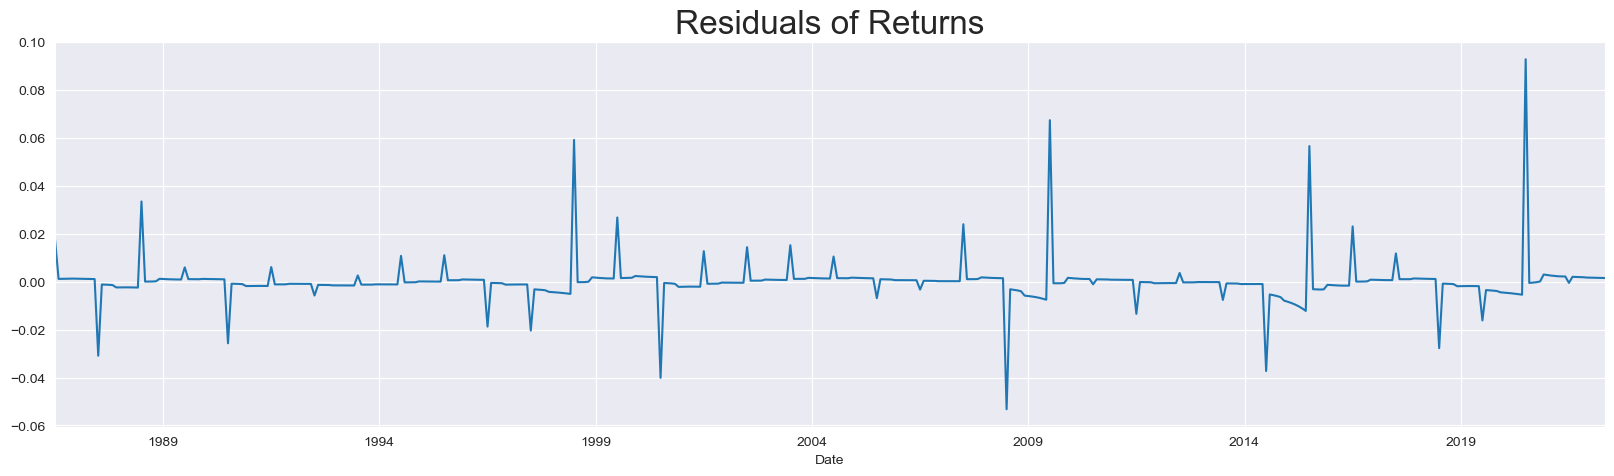

In [439]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

### Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [440]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# We are only passing the Box Cox because the ARIMAX will perform the differencing internally
# seasonal_order P=1, Q=1, D=1 and m=12
# m=12 . Because the seasonality is monthly.

In [441]:
train_data_boxcox

,COSP
Date,
1986-06-30,2.711378
1986-07-31,2.734097
1986-08-31,2.756311
1986-09-30,2.778043
1986-10-31,2.799312
...,...
2022-01-31,4.427786
2022-02-28,4.454076
2022-03-31,4.479692


In [442]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.91624D+00    |proj g|=  2.65425D+01

At iterate    5    f= -2.96862D+00    |proj g|=  2.70421D-01

At iterate   10    f= -2.97433D+00    |proj g|=  1.29212D+01


 This problem is unconstrained.



At iterate   15    f= -3.08525D+00    |proj g|=  2.92519D+00

At iterate   20    f= -3.10339D+00    |proj g|=  3.98443D+00

At iterate   25    f= -3.15694D+00    |proj g|=  3.86926D+00

At iterate   30    f= -3.15843D+00    |proj g|=  8.95705D+00

At iterate   35    f= -3.16083D+00    |proj g|=  6.31171D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     52      1     0     0   6.312D-01  -3.161D+00
  F =  -3.1608342081360914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [443]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

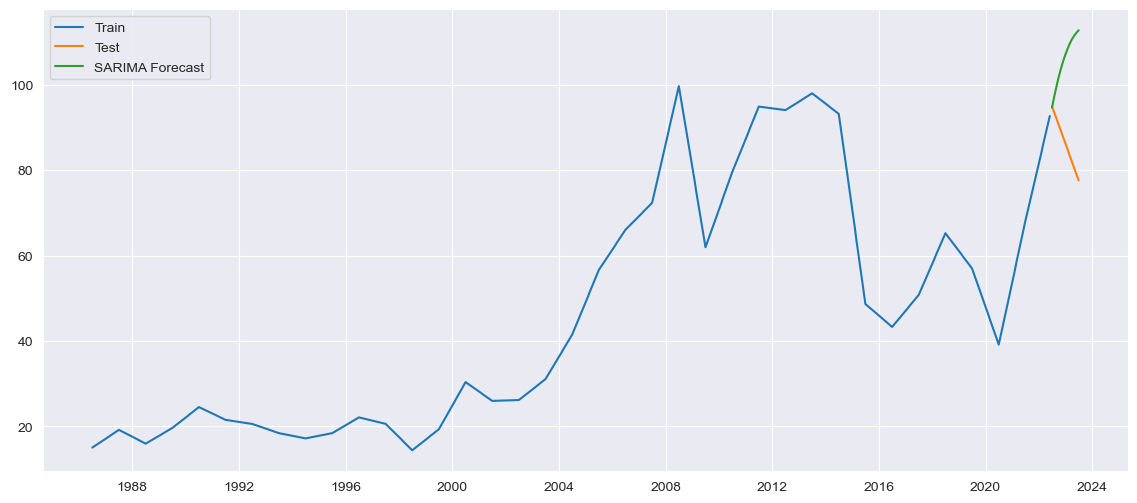

In [444]:
plt.figure(figsize=(14,6))
plt.plot(train_data['COSP'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [445]:
rmse_SARIMA = np.sqrt(mean_squared_error(test_data, y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
rmse_SARIMA

22.43

In [446]:
mape_sarima = round(np.mean(np.abs((test_data.COSP - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data.COSP)*100),2)
mape_sarima

23.57

In [447]:
model_residual = model_fit.resid
model_residual.mean()

0.0035262377304987437

In [448]:
y_hat_sarima

,COSP,sarima_forecast_boxcox,sarima_forecast
Date,,,
1986-07-31,0.022719,2.711378,15.050000
1986-08-31,0.022214,2.734097,15.395833
1986-09-30,0.021731,2.756311,15.741667
1986-10-31,0.021269,2.778043,16.087500
1986-11-30,0.020826,2.799312,16.433333
...,...,...,...
2023-02-28,-0.017168,4.697212,109.641016
2023-03-31,-0.017468,4.706354,110.647973
2023-04-30,-0.017778,4.713891,111.485105


In [449]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


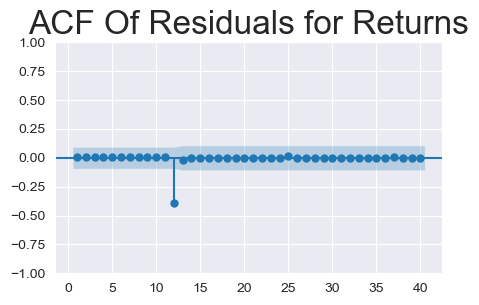

In [450]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

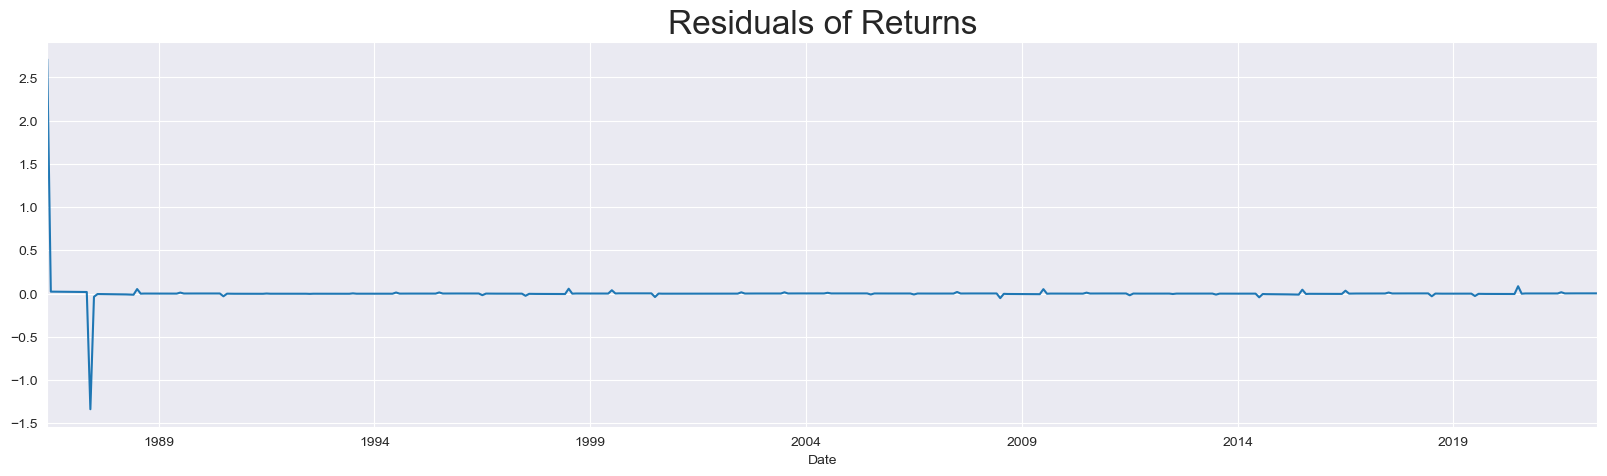

In [451]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()